<center style="font-weight: bold; font-size: 20px; padding: 20px;">Aziz ul haq</center>
<center style="font-weight: bold; font-size: 20px; padding: 20px;">Titanic_Assignment</center>
<center style="font-weight: bold; font-size: 20px; padding: 20px;">Linear_Regression</center>

## Importing libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
# Step 1: Load the Titanic dataset
df = pd.read_csv(r'C:\Users\DELL XPS\Desktop\AI & ML\Data\titanic.csv')
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [10]:
# Step 2: Data Cleaning
# Drop unnecessary columns
df.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)

In [11]:
# Convert categorical variables to numerical
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [12]:
# Step 3: Data Preprocessing
X = df.drop("Survived", axis=1)
y = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 4 Apply Linear Regression model
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Create the linear regression model
model = LinearRegression()

# Fit the model on the imputed data
model.fit(X_train_imputed, y_train)

LinearRegression()

In [23]:
# Step 5: Model Evaluation

from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Impute missing values in X_train and X_test
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)  # Fit and transform on training data
X_test_imputed = imputer.transform(X_test)        # Only transform on test data

# Step 2: Fit the model on the imputed training data
model = LinearRegression()
model.fit(X_train_imputed, y_train)  # Fit the model to the training data

# Step 3: Predict using the model with the imputed X_test data
y_pred = model.predict(X_test_imputed)

# Step 4: Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.14
R-squared: 0.44


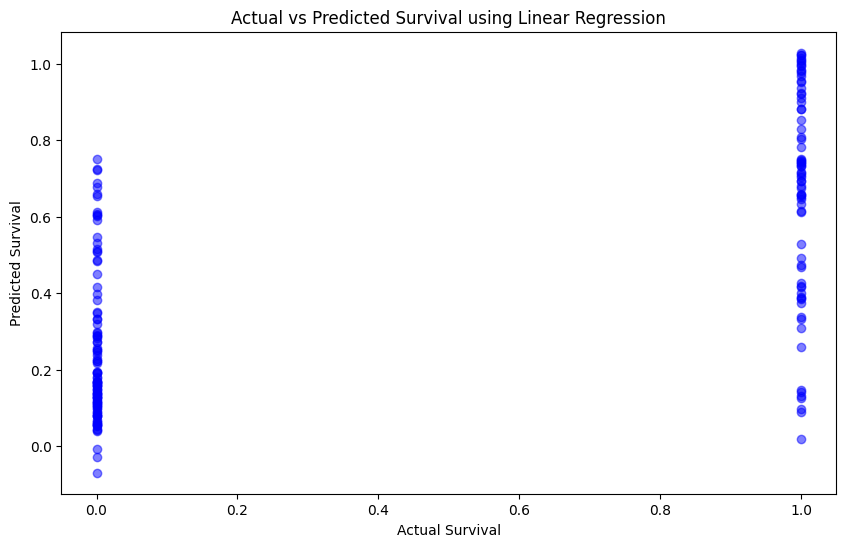

In [24]:
# Step 6: Data Visualization
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel("Actual Survival")
plt.ylabel("Predicted Survival")
plt.title("Actual vs Predicted Survival using Linear Regression")
plt.show()

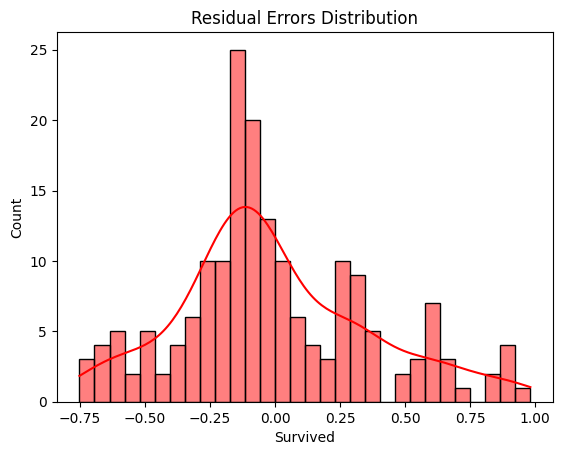

In [25]:
# Plot residual errors
residuals = y_test - y_pred
sns.histplot(residuals, bins=30, kde=True, color='red')
plt.title("Residual Errors Distribution")
plt.show()